# IBM Data Science - Capstone Project

## Week 4,  5 - Opening a Vietnamese Restaurant in the city of Toronto, Canada
--------------------------------------------------------------------------------

## Executive Summary

- **Topic**: Opening a Vietnamese restaurant in Toronto, Canada.

- **Target Audience**: Food and Beverage business owner who is looking for the most suitable location in Toronto to open a new Vietnamese Restaurant.

- **How the analysis can help the target audience?**: 
    + First, the analysis will breakdown all the Toronto neighborhoods into clusters and find the most suitable cluster to open a restaurant.
    + Second, segregate the defined cluster to more details on cuisine distribution, especially Asian restaurants (indirect competitor) and Vietnamese restaurants (direct competitor).
    + Finally, suggest the best neighborhood to open a new Vietnamese Restaurant.

## Data Collection

- **Geographical data**: To maintain simplicity and coherence of Capstone project as a whole, week 3's Toronto bourough and neighborhood data is to be reused in this project.

- **Data on venues**: Foursquare API is to be used to explore venues in Toronto and segment them.

## Table of Contents

1. Import Libraries, Create Data frame and Data Processing
2. Get the latitude and the longitude coordinates of each neighborhood
3. Explore the neighborhoods in Toronto using geographical data from Wikipedia
4. Using Foursquare API to explore venues in the neighborhoods and segment them.
5. Segregate and visualize restaurants by neighborhood and by cuisine
6. Resutls
7. Discussion
8. Conclusion
--------------------------------------------------------------------------------------

### 1. Import Libraries, Create Data frame and Data Processing

#### 1.1 Import and Install Libraries

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 6.7MB/s eta 0:00:01     |█████████                       | 1.6MB 6.7MB/s eta 0:00:01| 4.4MB 6.7MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALL

#### 1.2. Scraping the Wikipedia page for the table of postal codes of Canada

Using BeautifulSoup

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [3]:
df = pd.read_html(tab)[0]

df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### 1.3. Data Processing

- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
- If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.

In [4]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df_PC = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df_PC.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df_PC['Neighbourhood'] = np.where(df_PC['Neighbourhood'] == 'Not assigned',df_PC['Borough'], df_PC['Neighbourhood'])

df_PC

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


- Using the .shape method to print the number of rows of your dataframe.

In [5]:
# Print the shape of the data frame

df_PC.shape

(103, 3)

### 2. Get the latitude and the longitude coordinates of each neighborhood. 

#### 2.1. Importing the csv file containing the latitudes and longitudes of neighbourhoods in Canada

In [6]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')

lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### 2.2. Merging the two tables to get the Latitudes and Longitudes together with neighborhoods in Canada

In [7]:
df_latlon = pd.merge(df_PC,lat_lon,on='Postal Code')

df_latlon.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### 3. Explore and cluster the neighborhoods in Toronto.

#### 3.1. Work with only boroughs that contain the word Toronto: Get rows from the data frame which contains Toronto in their Borough.

In [8]:
df_tor = df_latlon[df_latlon['Borough'].str.contains('Toronto',regex=False)]
df_tor

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


#### 3.2. Visualizing the neighborhoods in Toronto using Folium

In [9]:
map_tor = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df_tor['Latitude'],df_tor['Longitude'],df_tor['Borough'],df_tor['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_tor)
    
map_tor

### 4. Using Foursquare API to explore venues in the neighborhoods and segment them

#### 4.1. Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'NNEUQTGDAH2NEOWJJ1OPMARF3ZG0VCG5IJ5KJWDPNPEOPSVF' # your Foursquare ID
CLIENT_SECRET = 'VLT4XV4AVNKCM2IN1EW2KG1CLDY4MROBUEP2H21ZF00YTAJ3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NNEUQTGDAH2NEOWJJ1OPMARF3ZG0VCG5IJ5KJWDPNPEOPSVF
CLIENT_SECRET:VLT4XV4AVNKCM2IN1EW2KG1CLDY4MROBUEP2H21ZF00YTAJ3


#### 4.2. Create a function to get the top 100 venues within 500 radius for all the neighborhoods in Toronto

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
toronto_venues = getNearbyVenues(names=df_tor['Neighbourhood'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [13]:
print(toronto_venues.shape)
toronto_venues.head()

(1602, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [14]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,59,59,59,59,59,59
Christie,15,15,15,15,15,15
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,32,32,32,32,32,32


In [15]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))
print(toronto_venues['Venue Category'].unique())

There are 230 uniques categories.
['Bakery' 'Coffee Shop' 'Distribution Center' 'Spa' 'Restaurant' 'Pub'
 'Park' 'Breakfast Spot' 'Gym / Fitness Center' 'Historic Site'
 'Chocolate Shop' 'Farmers Market' 'Performing Arts Venue'
 'Greek Restaurant' 'French Restaurant' 'Café' 'Dessert Shop'
 'Yoga Studio' 'Theater' 'Event Space' 'Shoe Store' 'Asian Restaurant'
 'Brewery' 'Art Gallery' 'Electronics Store' 'Cosmetics Shop' 'Bank'
 'Beer Store' 'Hotel' 'Health Food Store' 'Wine Shop' 'Antique Shop'
 'Italian Restaurant' 'Creperie' 'Beer Bar' 'Sushi Restaurant'
 'Burrito Place' 'Mexican Restaurant' 'Diner' 'Fried Chicken Joint'
 'Japanese Restaurant' 'Smoothie Shop' 'Sandwich Place' 'Gym' 'Bar'
 'College Auditorium' 'College Cafeteria' 'Clothing Store' 'Comic Shop'
 'Plaza' 'Music Venue' 'Pizza Place' 'Thai Restaurant' 'Burger Joint'
 'Ramen Restaurant' 'Steakhouse' 'Tanning Salon' 'Fast Food Restaurant'
 'Shopping Mall' 'Sporting Goods Shop' 'College Rec Center'
 'Middle Eastern Restaurant'

#### 4.3. Analyze each neighborhood

In [16]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
col_neigh = toronto_onehot['Neighborhood']
toronto_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
toronto_onehot.insert(0, 'Neighborhood', col_neigh)

toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017241,...,0.000000,0.00000,0.000000,0.00,0.017241,0.00000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.041667
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.058824
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.066667,0.066667,0.133333,0.133333,0.133333,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.00,0.016949,0.00000,0.000000,0.016949,0.000000,0.016949
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.026667
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.00,0.010000,...,0.000000,0.00000,0.000000,0.00,0.020000,0.00000,0.000000,0.010000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.03125,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [18]:
toronto_grouped.shape

(39, 230)

Print each neighborhood with the top 5 venues

In [19]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2          Bakery  0.05
3  Farmers Market  0.03
4        Pharmacy  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.12
1  Breakfast Spot  0.08
2     Coffee Shop  0.08
3       Nightclub  0.08
4     Yoga Studio  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0  Gym / Fitness Center  0.06
1               Brewery  0.06
2            Smoke Shop  0.06
3            Skate Park  0.06
4            Restaurant  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0       Airport Lounge  0.13
1      Airport Service  0.13
2     Airport Terminal  0.13
3              Airport  0.07
4  Rental Car Location  0.07


----Central Bay Street----
                venue  freq
0         Coff

Display the top 10 venues for each neighborhood.

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(12)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Farmers Market,Seafood Restaurant,Restaurant,Pharmacy,Cheese Shop,Beer Bar,Café
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Yoga Studio,Performing Arts Venue,Burrito Place,Restaurant,Climbing Gym,Convenience Store
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Smoke Shop,Auto Workshop,Brewery,Burrito Place,Butcher,Comic Shop,Farmers Market,Fast Food Restaurant,Garden
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Airport,Bar,Coffee Shop,Rental Car Location,Sculpture Garden,Boat or Ferry,Boutique
4,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Burger Joint,Bubble Tea Shop,Salad Place,Portuguese Restaurant
5,Christie,Grocery Store,Café,Park,Nightclub,Baby Store,Candy Store,Italian Restaurant,Coffee Shop,Restaurant,Dumpling Restaurant
6,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Hotel,Men's Store,Café,Pub
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Gym,Italian Restaurant,American Restaurant,Japanese Restaurant,Seafood Restaurant,Cocktail Bar
8,Davisville,Sandwich Place,Dessert Shop,Sushi Restaurant,Pizza Place,Gym,Café,Italian Restaurant,Coffee Shop,Seafood Restaurant,Farmers Market
9,Davisville North,Gym / Fitness Center,Hotel,Pizza Place,Department Store,Sandwich Place,Breakfast Spot,Food & Drink Shop,Park,Gastropub,Gift Shop


#### 4.4. Cluster the neighborhoods by venues

In [22]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0,
       0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [23]:
df_tor = df_tor.rename(columns = {'Neighbourhood': 'Neighborhood'}, inplace = False)
df_tor

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [24]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_tor

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,French Restaurant,Greek Restaurant,Wine Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,College Cafeteria,Diner,Fried Chicken Joint,Sandwich Place,Burrito Place,Café,Smoothie Shop,Japanese Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Japanese Restaurant,Middle Eastern Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Italian Restaurant,Hotel,Bookstore
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Gym,Italian Restaurant,Restaurant,Farmers Market,Clothing Store
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Asian Restaurant,Health Food Store,Trail,Pub,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Electronics Store


Visualizing the clusters

In [25]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Cluster 1**: Restaurants/Cafe

This cluster shows that restaurants and cafes are distributed evenly and widespread throughout all the neighborhood in Toronto

In [26]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Regent Park, Harbourfront",0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,French Restaurant,Greek Restaurant,Wine Shop
4,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Sushi Restaurant,College Cafeteria,Diner,Fried Chicken Joint,Sandwich Place,Burrito Place,Café,Smoothie Shop,Japanese Restaurant
9,"Garden District, Ryerson",0,Clothing Store,Coffee Shop,Japanese Restaurant,Middle Eastern Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Italian Restaurant,Hotel,Bookstore
15,St. James Town,0,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Gym,Italian Restaurant,Restaurant,Farmers Market,Clothing Store
19,The Beaches,0,Asian Restaurant,Health Food Store,Trail,Pub,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Electronics Store
20,Berczy Park,0,Coffee Shop,Bakery,Cocktail Bar,Farmers Market,Seafood Restaurant,Restaurant,Pharmacy,Cheese Shop,Beer Bar,Café
24,Central Bay Street,0,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Burger Joint,Bubble Tea Shop,Salad Place,Portuguese Restaurant
25,Christie,0,Grocery Store,Café,Park,Nightclub,Baby Store,Candy Store,Italian Restaurant,Coffee Shop,Restaurant,Dumpling Restaurant
30,"Richmond, Adelaide, King",0,Coffee Shop,Café,Restaurant,Clothing Store,Hotel,Deli / Bodega,Thai Restaurant,Bakery,Gym,Salad Place
31,"Dufferin, Dovercourt Village",0,Bakery,Pharmacy,Music Venue,Café,Middle Eastern Restaurant,Supermarket,Bar,Bank,Pool,Pet Store


**Cluster 2**: Park/Playground/Trail

In [27]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,"Moore Park, Summerhill East",1,Restaurant,Park,Trail,Dessert Shop,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
91,Rosedale,1,Park,Playground,Trail,Yoga Studio,Diner,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant


**Cluster 3**: Jewelry Store/Trail

In [28]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,"Forest Hill North & West, Forest Hill Road Park",2,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Yoga Studio,Discount Store,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store


**Cluster 4**: Park/Bus Line

In [29]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Lawrence Park,3,Park,Bus Line,Swim School,Yoga Studio,Discount Store,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant


**Cluster 5**: Home Service/Garden/Yoga Studio

In [30]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Roselawn,4,Health & Beauty Service,Home Service,Garden,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store


### 4. Segregate and visualize restaurants by neighborhood and by cuisine

#### 4.1. List, count and segregate all restaurants among all venues extracted from Frousquare

In [31]:
# list down the restaurants by cuisine
restaurant_list =['Restaurant', 'Snack Place','Food Court','Pizza Place','Taco Place', 'Fish & Chips Shop','Burrito Place','Noodle House','Salad Place','Food & Drink Shop','Bistro','Burger Joint','Diner','Sandwich Place','Breakfast Spot']
asian_restaurant_list = ['Asian Restaurant', 'Chinese Restaurant', 'Filipino Restaurant', 'Japanese Restaurant', 'Vietnamese Restaurant', 'Taiwanese Restaurant', 'Korean Restaurant', 'Tibetan Restaurant', 'Thai Restaurant', 'Dumpling Restaurant', 'Ramen Restaurant', 'Sushi Restaurant']
viet_restaurant_list = ['Vietnamese Restaurant']

# select venues flagged as restaurants
toronto_venues['RestFlag']=False
for restCat in restaurant_list:
    toronto_venues['RestFlag'] = toronto_venues['RestFlag'] | toronto_venues['Venue Category'].str.contains(restCat)
    
toronto_restaurants = toronto_venues[toronto_venues['RestFlag'] == True].iloc[:,:-1]

In [32]:
# numbers of restaurants by cuisine
viet_restaurants = toronto_restaurants[ toronto_restaurants['Venue Category'].isin(viet_restaurant_list) ]
asian_restaurants = toronto_restaurants[ toronto_restaurants['Venue Category'].isin(asian_restaurant_list) ]

print('Total number of restaurants:', len(toronto_restaurants['Venue'].unique()))
print('Total number of Asian restaurants:', len(asian_restaurants['Venue'].unique()))
print('Total number of Vietnamese restaurants:', len(viet_restaurants['Venue'].unique()))

Total number of restaurants: 348
Total number of Asian restaurants: 83
Total number of Vietnamese restaurants: 6


In [33]:
# 1. All  restaurants
# get counts of restaurants in each Neighborhood
df_rest_counts =  toronto_restaurants.groupby(['Neighborhood']).count().rename(columns={"Venue Category": "RestaurantCount"})[['RestaurantCount']]

# find neighborhoods that have no restaurants
noRestList = list(set(toronto_venues['Neighborhood']) - set(toronto_restaurants['Neighborhood']))

# if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)


# 2. Asian restaurants
# get counts of Asian restaurants in each Neighborhood
df_asian_rest_counts =  asian_restaurants.groupby(['Neighborhood']).count().rename(columns={"Venue Category": "Asian RestaurantCount"})[['Asian RestaurantCount']]

# if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_asian_rest_counts = df_asian_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'Asian RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))
    
df_asian_rest_counts.reset_index(inplace=True)


# 3. Vietnamese restaurants
# get counts of Vietnamese restaurants in each Neighborhood
df_viet_rest_counts =  viet_restaurants.groupby(['Neighborhood']).count().rename(columns={"Venue Category": "Viet RestaurantCount"})[['Viet RestaurantCount']]

# find neighborhoods that does not have any restaurant 
noRestList = list(set(toronto_venues['Neighborhood']) - set(viet_restaurants['Neighborhood']))

# if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_viet_rest_counts = df_viet_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'Viet RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))
    
df_viet_rest_counts.reset_index(inplace=True)


# 4. Merge all restaurant count list
df_rest_counts= df_rest_counts.merge(df_viet_rest_counts).merge(df_asian_rest_counts).set_index('Neighborhood')

df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any Vietnamse restaurant'.format(len(noRestList)))

35 neighborhoods do not have any Vietnamse restaurant


#### 4.2. Visualize all restaurants, Asian restaurants and Vietnamese restaurants by neighborhood

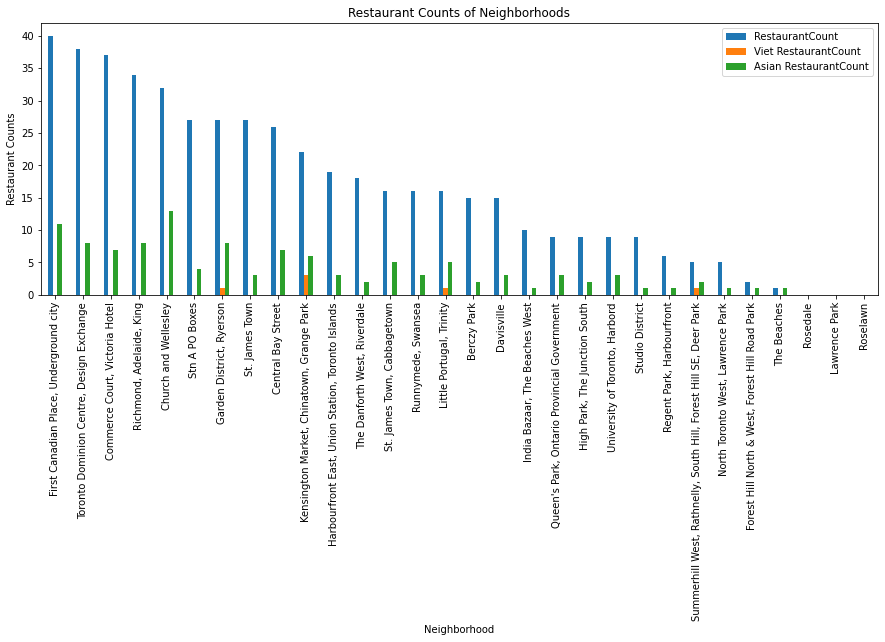

In [34]:
# Visualize the distribution of cuisines by neighborhood
import matplotlib.pyplot as plt

df_rest_counts[['RestaurantCount','Viet RestaurantCount', 'Asian RestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

### 6. Results

#### 6.1. Selected cluster for a new restaurant: 

Cluster 1 as shown below

In [35]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Regent Park, Harbourfront",0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Pub,Theater,French Restaurant,Greek Restaurant,Wine Shop
4,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Sushi Restaurant,College Cafeteria,Diner,Fried Chicken Joint,Sandwich Place,Burrito Place,Café,Smoothie Shop,Japanese Restaurant
9,"Garden District, Ryerson",0,Clothing Store,Coffee Shop,Japanese Restaurant,Middle Eastern Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Italian Restaurant,Hotel,Bookstore
15,St. James Town,0,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Gym,Italian Restaurant,Restaurant,Farmers Market,Clothing Store
19,The Beaches,0,Asian Restaurant,Health Food Store,Trail,Pub,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Electronics Store
20,Berczy Park,0,Coffee Shop,Bakery,Cocktail Bar,Farmers Market,Seafood Restaurant,Restaurant,Pharmacy,Cheese Shop,Beer Bar,Café
24,Central Bay Street,0,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Burger Joint,Bubble Tea Shop,Salad Place,Portuguese Restaurant
25,Christie,0,Grocery Store,Café,Park,Nightclub,Baby Store,Candy Store,Italian Restaurant,Coffee Shop,Restaurant,Dumpling Restaurant
30,"Richmond, Adelaide, King",0,Coffee Shop,Café,Restaurant,Clothing Store,Hotel,Deli / Bodega,Thai Restaurant,Bakery,Gym,Salad Place
31,"Dufferin, Dovercourt Village",0,Bakery,Pharmacy,Music Venue,Café,Middle Eastern Restaurant,Supermarket,Bar,Bank,Pool,Pet Store


#### 6.2. Visualization of restaurants across each neighborhood by cuisine

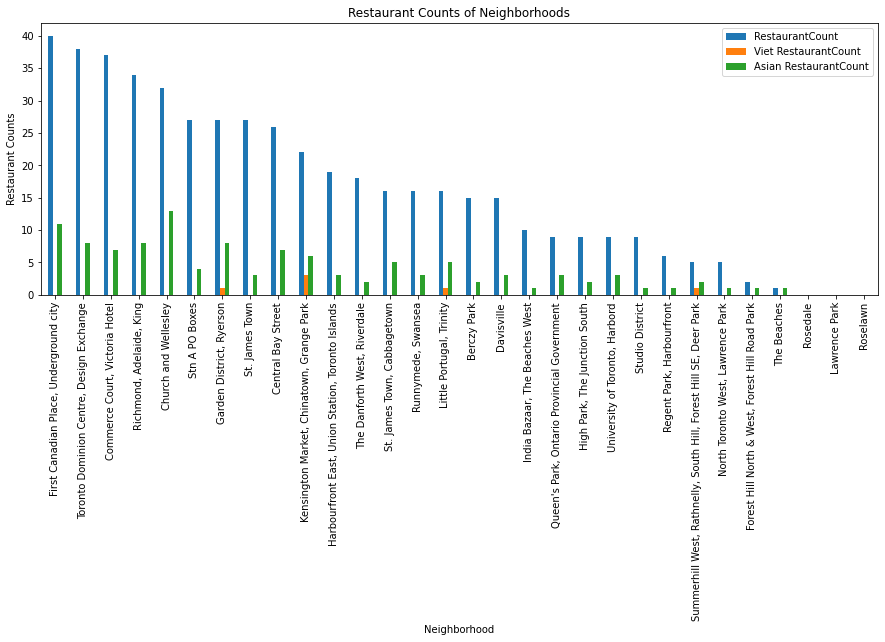

In [36]:
df_rest_counts[['RestaurantCount','Viet RestaurantCount', 'Asian RestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

### 7. Discussion

- The clustering of venues by neighborhood in part 3. shows that restaurants and cafes are evenly spread throughout all the neighborhoods of Toronto, except The Beaches, Roselawn and the Parks, makes it not enough to just use this clustering to conclude which neighborhood is the most potential to open a new Vietnamese restaurant.
- Therefore, part 4. is necessary to segregate and visualize the distribution of all restaurants in each neighborhood by cuisine, and to have a clearer picture on where the indirect competitors (other Asian restaurants) and the direct competitors (other Vietnamese restaurants) are situated.

### 8. Conclusion

- The most suitable neighborhoods in this business exercises, based on this analysis is neighborhoods belonging to cluster 1 of part 3., and neighborhoods that has high number of restaurants in general but not so many Asian/Vietnamese restaurants in part 4.
- The neighborhoods with a high number of restaurants are potential to have high diner traffic with multiple choices. Besides, if the said neighborhoods do not have many existing Asian/Vietnamese restaurants, the possibility for a Vietnamese restaurant to be chosen would be higher.
- Therefore, the most potential neighborhoods in this case could be:
    + Stn A PO Boxes
    + St. James Town
    + Commerce Court, Victoria Hotel